In [76]:
import cv2
import scipy.misc
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [77]:
img_path='C:/Users/wlwy/Desktop/car.jpg'

In [78]:
bgr_img=cv2.imread(img_path)

In [79]:
print(np.shape(bgr_img))#三种颜色

(719, 1024, 3)


In [80]:
#灰度图
gray_img=cv2.cvtColor(bgr_img,cv2.COLOR_BGR2GRAY)
np.shape(gray_img)#就灰白

(719, 1024)

In [81]:
#缩小为原来的0.3
small_img=scipy.misc.imresize(gray_img,0.3)
np.shape(small_img)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  from ipykernel import kernelapp as app


(215, 307)

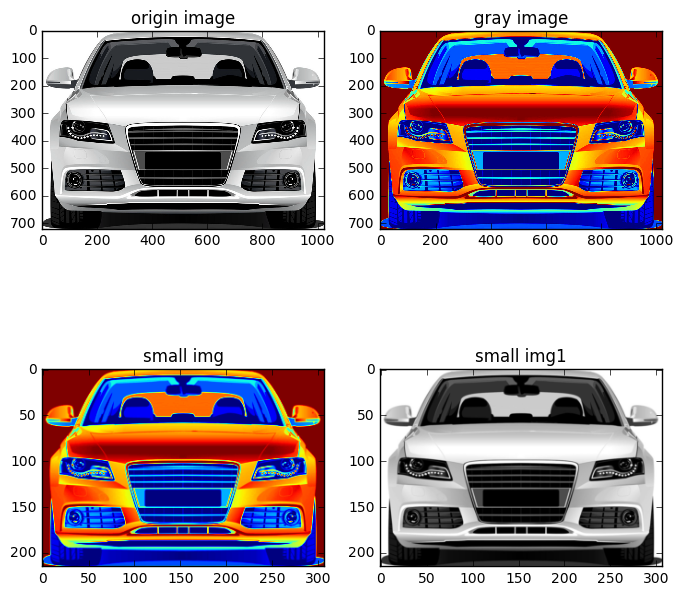

In [82]:
plt.figure(num='car',figsize=(8,8)) 
plt.subplot(2,2,1) 
plt.title('origin image')
plt.imshow(bgr_img)

plt.subplot(2,2,2) 
plt.title('gray image')
plt.imshow(gray_img)

plt.subplot(2,2,3) 
plt.title('small img')
plt.imshow(small_img)

plt.subplot(2,2,4) 
plt.title('small img1')
plt.imshow(small_img,cmap='gray')


plt.show()

In [83]:
small_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [254, 251, 229, ..., 251, 253, 253],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [84]:
small_img1=small_img.astype('float32')/255

In [85]:
small_img1

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.99607843, 0.9843137 , 0.8980392 , ..., 0.9843137 , 0.99215686,
        0.99215686],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]], dtype=float32)

In [86]:
#指定过滤器
import numpy as np
filter_val=np.array([[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1]])
filter_1=filter_val
filter_2=-filter_1
filter_3=filter_val.T
filter_4=-filter_3
filters=[filter_1,filter_2,filter_3,filter_4]
filters

[array([[-1, -1,  1,  1],
        [-1, -1,  1,  1],
        [-1, -1,  1,  1],
        [-1, -1,  1,  1]]), array([[ 1,  1, -1, -1],
        [ 1,  1, -1, -1],
        [ 1,  1, -1, -1],
        [ 1,  1, -1, -1]]), array([[-1, -1, -1, -1],
        [-1, -1, -1, -1],
        [ 1,  1,  1,  1],
        [ 1,  1,  1,  1]]), array([[ 1,  1,  1,  1],
        [ 1,  1,  1,  1],
        [-1, -1, -1, -1],
        [-1, -1, -1, -1]])]

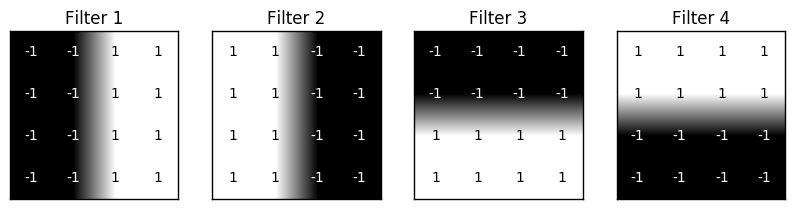

In [87]:
#可视化过滤器
fig=plt.figure(figsize=(10,5))
for i in range(4):
    ax=fig.add_subplot(1,4,i+1,xticks=[],yticks=[])
    ax.imshow(fliters[i],cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width,height=fliters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(fliters[i][x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center',color='white' if fliters[i][x][y]<0 else 'black')

In [72]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
import matplotlib.cm as cm

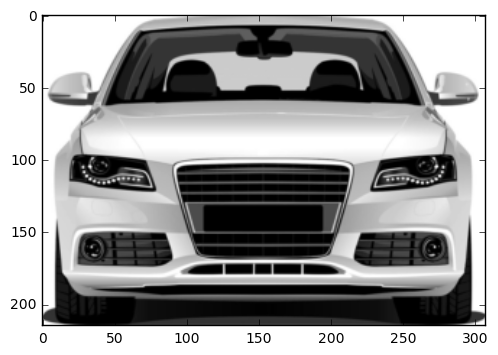

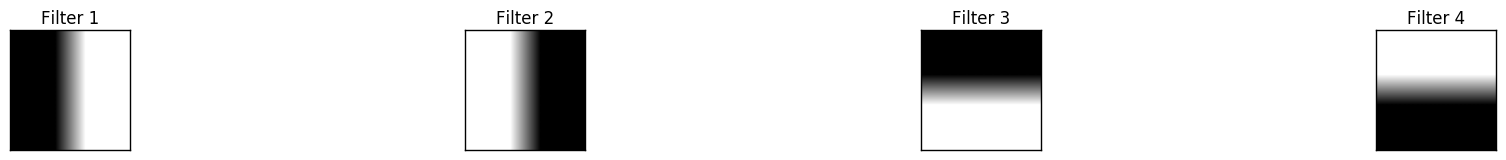

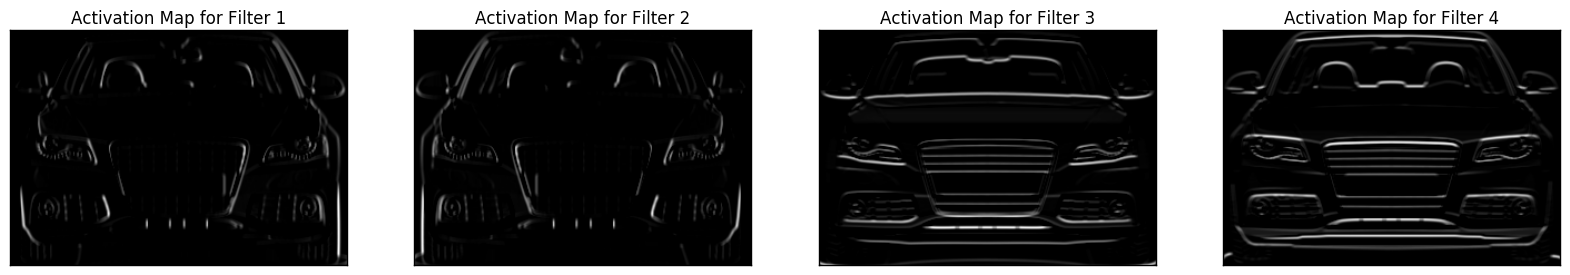

In [90]:
plt.imshow(small_img,cmap='gray')
#设置模型
model=Sequential()
model.add(Convolution2D(1,(4,4),activation='relu',input_shape=(small_img.shape[0],small_img.shape[1],1)))
#高，宽，深

def apply_filter(img,index,filter_list,ax):
    model.layers[0].set_weights([np.reshape(filter_list[index],(4,4,1,1)),np.array([0])])
    ax.imshow(np.squeeze(model.predict(np.reshape(img,(1,img.shape[0],img.shape[1],1)))),cmap='gray')

fig=plt.figure(figsize=(12,6))
fig.subplots_adjust(left=0,right=1.5,bottom=0.8,top=1,hspace=0.05,wspace=0.05)
for i in range(4):#四个滤波器
    ax=fig.add_subplot(1,4,i+1,xticks=[],yticks=[])
    ax.imshow(fliters[i],cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

fig=plt.figure(figsize=(20,20))
for i in range(4):
    ax=fig.add_subplot(1,4,i+1,xticks=[],yticks=[])
    apply_filter(small_img,i,filters,ax)
    ax.set_title('Activation Map for Filter %s' % str(i+1))

In [91]:
#卷积层
from keras.layers import Conv2D
Conv2D(filters=16,kernel_size=2,strides=2,activation='relu',input_shape=(200,200,1))

In [92]:
#池化层
from keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size=4,strides=4,input_shape=(100,100,15)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 212, 304, 1)       17        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 76, 1)         0         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
